# Problem: Review the global trends of COVID-19. Then, evaluate the impact of covid-19 by using the dataset to find the answers.

TARGET 'y': We will study the COVID-19 virus pattern to understand which countries executed effective stps and what we can learn from the patterns. Our target countries include: the USA, Spain, Italy, China and South Korea.

### Note:
If we were trying to find people who may have COVID-19, we'd want to avoid false negatives, or Type II errors, and telling someone they were healthy when they're actually dying. If COVID-19 was a rare event we could fall into the class imbalance problem. 

# Methodology:
1) Load Data set
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
2) Exploratory Data Analysis (Preprocessing)
    a) Data Cleaning 
    b) Data Exploration (Descriptive Statistics) 
    c) Feature Engineering
    
3) Modeling
4) Evaluating Performance
5) Summary

In [2]:
#Install libraries for advanced visualization
!pip install bubbly
!pip install pandas-profiling

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# for some cool Stats
import statsmodels.api as sm 
from statsmodels.api import add_constant

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import plotly.express as px

  Created wheel for bubbly: filename=bubbly-1.0.2-cp37-none-any.whl size=5429 sha256=273371c60dfb84c1f3d298720a0d050806b476fff413b9cce75bd7f536357c7b
  Stored in directory: /Users/mehrunisaqayyum/Library/Caches/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Note: load data set from https://github.com/CSSEGISandData/COVID-19
    *cf = confirmed
    *d =deaths
    *rc = recoveries

In [13]:
#Attempt 4
cf_covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cf_covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616
263,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
264,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056
265,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15415,15458,15549,15587,15616,15659,15659,15789,15853,15897


In [14]:
#Continuing w/other cases  
d_covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
d_covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1473,1477,1479,1480,1481,1481,1485,1488,1492,1497
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,416,420,424,429,434,439,443,448,451,454
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1795,1801,1809,1818,1827,1827,1841,1846,1856,1865
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,55,55,57,57,59,59,59,59,59,62
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,218,218,219,222,227,228,234,241,247,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,378,381,387,391,393,401,402,402,408,413
263,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
264,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,595,595,596,596,596,596,596,596,597,597
265,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,337,337,345,345,345,346,346,346,346,346


In [16]:
#Global Recovered data
rc_covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
rc_covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,33064,33114,33118,33308,33354,33447,33516,33561,33614,33760
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9406,9500,9585,9675,9762,9864,9957,10001,10071,10167
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,37170,37170,37382,37492,37603,37603,37856,37971,38088,38215
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1814,1814,1928,1928,2011,2011,2057,2057,2057,2273
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2716,2743,2744,2761,2801,2928,3012,3022,3030,3031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,37240,37942,38228,38841,39304,39585,39921,40162,40498,40861
250,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
251,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1329,1329,1329,1329,1329,1329,1335,1336,1338,1338
252,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,14541,14599,14682,14783,14850,14899,14899,14927,15005,15031


In [17]:
latest_covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')
latest_covid_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,3/29/20 23:08,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,3/29/20 23:08,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,3/29/20 23:08,37.767072,-75.632346,3,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,3/29/20 23:08,43.452658,-116.241552,92,1,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,3/29/20 23:08,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3429,NaN,NaN,NaN,Venezuela,3/29/20 23:08,6.423800,-66.589700,119,2,39,78,Venezuela
3430,NaN,NaN,NaN,Vietnam,3/29/20 23:08,14.058324,108.277199,188,0,25,163,Vietnam
3431,NaN,NaN,NaN,West Bank and Gaza,3/29/20 23:08,31.952200,35.233200,109,1,18,90,West Bank and Gaza
3432,NaN,NaN,NaN,Zambia,3/29/20 23:08,-13.133897,27.849332,29,0,0,29,Zambia


# II. Exploratory Data Analysis

In [67]:
#Look at data values
latest_covid_df.value_counts

<bound method DataFrame.value_counts of          FIPS     Admin2  Province_State      Country_Region    Last_Update  \
0     45001.0  Abbeville  South Carolina                  US  3/29/20 23:08   
1     22001.0     Acadia       Louisiana                  US  3/29/20 23:08   
2     51001.0   Accomack        Virginia                  US  3/29/20 23:08   
3     16001.0        Ada           Idaho                  US  3/29/20 23:08   
4     19001.0      Adair            Iowa                  US  3/29/20 23:08   
...       ...        ...             ...                 ...            ...   
3429      NaN        NaN             NaN           Venezuela  3/29/20 23:08   
3430      NaN        NaN             NaN             Vietnam  3/29/20 23:08   
3431      NaN        NaN             NaN  West Bank and Gaza  3/29/20 23:08   
3432      NaN        NaN             NaN              Zambia  3/29/20 23:08   
3433      NaN        NaN             NaN            Zimbabwe  3/29/20 23:08   

           

In [68]:
latest_covid_df.value_counts()

FIPS     Admin2    Province_State  Country_Region  Last_Update    Lat        Long_        Confirmed  Deaths  Recovered  Active  Combined_Key         
56045.0  Weston    Wyoming         US              3/29/20 23:08  43.839612  -104.567488  0          0       0          0       Weston, Wyoming, US      1
21123.0  Larue     Kentucky        US              3/29/20 23:08  37.545671  -85.701384   1          0       0          0       Larue, Kentucky, US      1
21119.0  Knott     Kentucky        US              3/29/20 23:08  37.353882  -82.949811   0          0       0          0       Knott, Kentucky, US      1
21117.0  Kenton    Kentucky        US              3/29/20 23:08  38.939503  -84.532412   17         1       0          0       Kenton, Kentucky, US     1
21115.0  Johnson   Kentucky        US              3/29/20 23:08  37.851064  -82.826432   0          0       0          0       Johnson, Kentucky, US    1
                                                                           

In [69]:
latest_covid_df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,3148.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,30472.462834,36.846297,-82.742830,209.708794,9.879150,43.411765,115.204426
std,15295.724160,10.097413,39.184680,2956.173088,234.856826,1161.782465,2024.521157
min,1001.000000,-42.882100,-170.132000,0.000000,0.000000,0.000000,0.000000
25%,18180.500000,33.953228,-97.628666,0.000000,0.000000,0.000000,0.000000
50%,29182.000000,38.067870,-89.041582,2.000000,0.000000,0.000000,0.000000
75%,45089.500000,41.728181,-81.716167,10.000000,0.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,97689.000000,10779.000000,62570.000000,73880.000000


In [70]:
cf_covid_df.value_counts

<bound method DataFrame.value_counts of     Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953        0   
1              NaN             Albania  41.153300  20.168300        0   
2              NaN             Algeria  28.033900   1.659600        0   
3              NaN             Andorra  42.506300   1.521800        0   
4              NaN              Angola -11.202700  17.873900        0   
..             ...                 ...        ...        ...      ...   
262            NaN  West Bank and Gaza  31.952200  35.233200        0   
263            NaN      Western Sahara  24.215500 -12.885800        0   
264            NaN               Yemen  15.552727  48.516388        0   
265            NaN              Zambia -13.133897  27.849332        0   
266            NaN            Zimbabwe -19.015438  29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  10/11/20  \
0     

In [72]:
cf_covid_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02
mean,20.961559,23.343773,2.078652,2.449438,3.524345,5.370787,7.932584,10.962547,20.891386,23.097378,...,1.393538e+05,1.403593e+05,1.415810e+05,1.428110e+05,1.442365e+05,1.457596e+05,1.473001e+05,1.485793e+05,1.496466e+05,1.512941e+05
std,24.928747,70.561551,27.228175,27.326766,34.019598,47.346836,66.166252,89.148259,218.779113,220.114337,...,7.223189e+05,7.270349e+05,7.313578e+05,7.363275e+05,7.421990e+05,7.481833e+05,7.543880e+05,7.597931e+05,7.639973e+05,7.693751e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.519578,-15.245250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.020000e+02,5.020000e+02,5.020000e+02,5.040000e+02,5.125000e+02,5.190000e+02,5.310000e+02,5.330000e+02,5.330000e+02,5.355000e+02
50%,22.300000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.892000e+03,4.896000e+03,4.905000e+03,5.038000e+03,5.068000e+03,5.068000e+03,5.113000e+03,5.123000e+03,5.130000e+03,5.134000e+03
75%,41.133100,79.867338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.547500e+04,4.565200e+04,4.585700e+04,4.616300e+04,4.647350e+04,4.692450e+04,4.763600e+04,4.826150e+04,4.937600e+04,5.047100e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,7.717932e+06,7.762546e+06,7.804199e+06,7.856605e+06,7.916099e+06,7.979709e+06,8.048865e+06,8.106384e+06,8.154594e+06,8.212981e+06


### Q1) Analyze countries like China, South Korea, USA, Italy and Spain individually to see increasing number of cases on day-to-day basis. Provide insight and feedback using a deck as if you were providing findings to Senior management

In [52]:
#Develop lists to add confirmed cases, deaths and recoveries 

cols = cf_covid_df.keys()
confirmed = cf_covid_df.loc[:, cols[4]:cols[-1]]
deaths = d_covid_df.loc[:, cols[4]:cols[-1]]
recoveries = rc_covid_df.loc[:, cols[4]:cols[-1]]


dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
south_korea_cases = []
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum) # | Subtract death and recovered confirmed cases
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    # Needs to remain in loop
    #case studies of China, South Korea, USA, Italy and Spain
    south_korea_cases.append(cf_covid_df[cf_covid_df['Country/Region']=='Korea, South'][i].sum())
    china_cases.append(cf_covid_df[cf_covid_df['Country/Region']=='China'][i].sum())
    italy_cases.append(cf_covid_df[cf_covid_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(cf_covid_df[cf_covid_df['Country/Region']=='US'][i].sum())
    spain_cases.append(cf_covid_df[cf_covid_df['Country/Region']=='Spain'][i].sum())

In [49]:
print(china_cases)

[[91006]]


## Italy Case
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv
03-29-2020.csv

### What's increase on daily basis?

In [106]:
# Define daily increase, which is our 'y'

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
south_korea_daily_increase =daily_increase(south_korea_cases)
spain_daily_increase = daily_increase(spain_cases)
us_daily_increase

[1,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 7,
 23,
 19,
 33,
 77,
 53,
 166,
 116,
 75,
 188,
 365,
 439,
 633,
 759,
 234,
 1467,
 1832,
 2654,
 4494,
 6367,
 5996,
 8802,
 11219,
 10577,
 12034,
 17894,
 18631,
 19607,
 18929,
 22013,
 26363,
 25819,
 30392,
 32000,
 33001,
 28184,
 30185,
 31399,
 32016,
 34648,
 33536,
 29357,
 26959,
 25791,
 28591,
 30008,
 31522,
 32806,
 27851,
 25681,
 28422,
 26038,
 29297,
 33431,
 33566,
 31801,
 27099,
 23174,
 24674,
 27845,
 29505,
 34220,
 28002,
 24502,
 23402,
 24563,
 25147,
 27790,
 26882,
 24968,
 18856,
 19447,
 22758,
 20966,
 27308,
 25298,
 24013,
 18114,
 22012,
 21044,
 23505,
 25665,
 23438,
 21197,
 20114,
 18317,
 19524,
 18590,
 22948,
 24351,
 23843,
 19172,
 17364,
 21373,
 19977,
 21719,
 25167,
 21836,
 17787,
 17528,
 18369,
 20824,
 23197,
 24865,
 25260,
 19372,
 19924,
 23795,
 25904,
 28185,
 31310,
 

In [54]:
#Review China case
df_china_cases = cf_covid_df[cf_covid_df['Country/Region']=='China']
df_china_cases.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,936,937,937,937,937,937,937,937,937,938
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,585,585,585,585,585,586,586,586,586,587
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,415,416,416,416,416,417,417,417,417,418
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,170,170,170,170,170,170,170,170,170,170


In [47]:
#Reshape for world
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
print(world_cases)

[[     555]
 [     654]
 [     941]
 [    1434]
 [    2118]
 [    2927]
 [    5578]
 [    6167]
 [    8235]
 [    9927]
 [   12038]
 [   16787]
 [   19887]
 [   23898]
 [   27643]
 [   30803]
 [   34396]
 [   37130]
 [   40160]
 [   42769]
 [   44811]
 [   45229]
 [   60382]
 [   66909]
 [   69051]
 [   71235]
 [   73270]
 [   75152]
 [   75652]
 [   76212]
 [   76841]
 [   78602]
 [   78982]
 [   79546]
 [   80399]
 [   81376]
 [   82736]
 [   84121]
 [   86014]
 [   88397]
 [   90375]
 [   92959]
 [   95276]
 [   98040]
 [  102040]
 [  106102]
 [  110062]
 [  114025]
 [  119036]
 [  126717]
 [  132506]
 [  146887]
 [  157965]
 [  169258]
 [  184002]
 [  199932]
 [  219462]
 [  246618]
 [  277253]
 [  309223]
 [  343456]
 [  386823]
 [  428295]
 [  479279]
 [  542006]
 [  606988]
 [  674380]
 [  733777]
 [  799018]
 [  875842]
 [  952368]
 [ 1033702]
 [ 1116958]
 [ 1197315]
 [ 1269291]
 [ 1342524]
 [ 1420265]
 [ 1504296]
 [ 1590776]
 [ 1678316]
 [ 1754531]
 [ 1849884]
 [ 1920029]
 [ 1

In [55]:
#Reshape China
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
china_cases = np.array(china_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
print(china_cases)

[[  548]
 [  643]
 [  920]
 [ 1406]
 [ 2075]
 [ 2877]
 [ 5509]
 [ 6087]
 [ 8141]
 [ 9802]
 [11891]
 [16630]
 [19716]
 [23707]
 [27440]
 [30587]
 [34110]
 [36814]
 [39829]
 [42354]
 [44386]
 [44759]
 [59895]
 [66358]
 [68413]
 [70513]
 [72434]
 [74211]
 [74619]
 [75077]
 [75550]
 [77001]
 [77022]
 [77241]
 [77754]
 [78166]
 [78600]
 [78928]
 [79356]
 [79932]
 [80136]
 [80261]
 [80386]
 [80537]
 [80690]
 [80770]
 [80823]
 [80860]
 [80887]
 [80921]
 [80932]
 [80945]
 [80977]
 [81003]
 [81033]
 [81058]
 [81102]
 [81156]
 [81250]
 [81305]
 [81435]
 [81498]
 [81591]
 [81661]
 [81782]
 [81897]
 [81999]
 [82122]
 [82198]
 [82279]
 [82361]
 [82432]
 [82511]
 [82543]
 [82602]
 [82665]
 [82718]
 [82809]
 [82883]
 [82941]
 [83014]
 [83134]
 [83213]
 [83306]
 [83356]
 [83403]
 [83760]
 [83787]
 [83805]
 [83817]
 [83853]
 [83868]
 [83884]
 [83899]
 [83909]
 [83912]
 [83918]
 [83940]
 [83944]
 [83956]
 [83959]
 [83959]
 [83964]
 [83966]
 [83968]
 [83970]
 [83975]
 [83976]
 [83990]
 [84010]
 [84011]
 

In [56]:
# Lets predict two weeks into future: 14 days in future
    #And check if we can get better predictions
#Adjusted Dates = adjusted_dates = 'X'

days_in_future = 14
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-14]

In [57]:
#Convert integer into datetime to better visualize
#Use loop foor forecasting 
import datetime
import operator 

plt.style.use('fivethirtyeight')
%matplotlib inline 
start = '1/1/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []

for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

### Visual of 2 Week Forecast


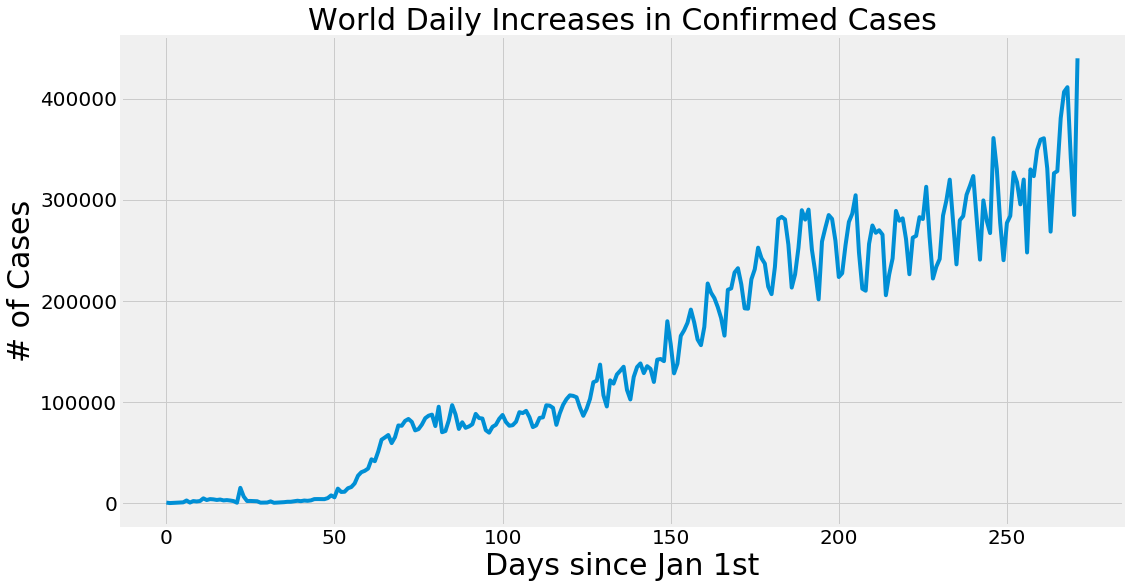

In [58]:
#World Daily
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_daily_increase) # x,y
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

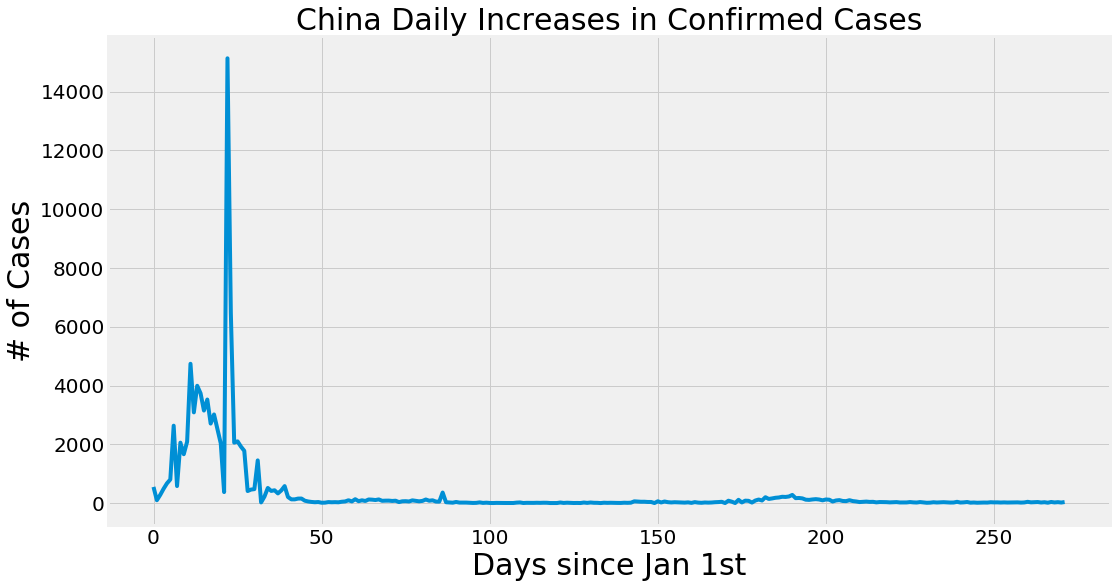

In [59]:
#China Daily increase 
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_daily_increase) #x,y
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

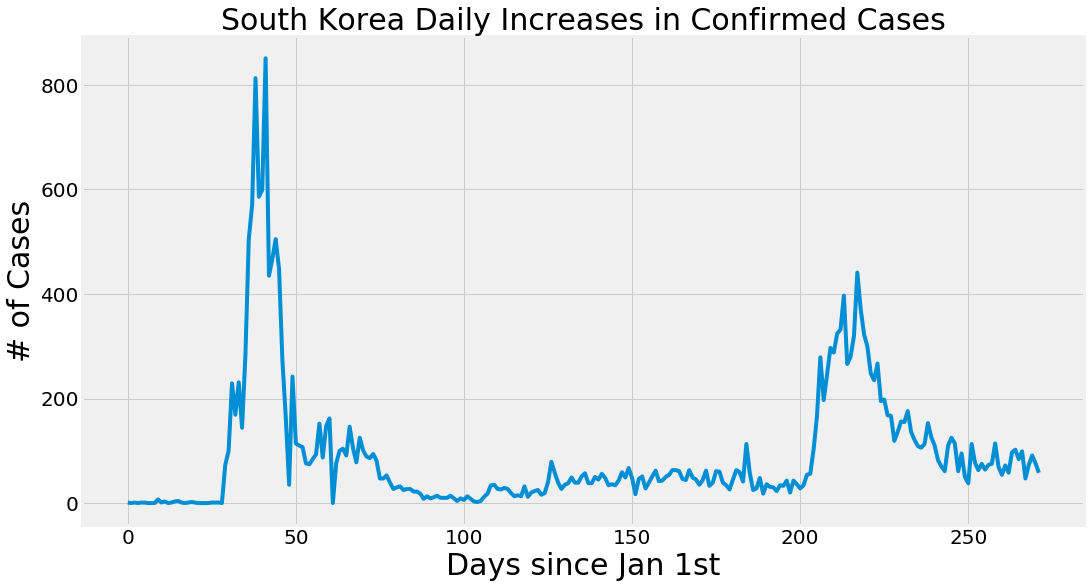

In [60]:
#South Korea
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, south_korea_daily_increase)
plt.title('South Korea Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

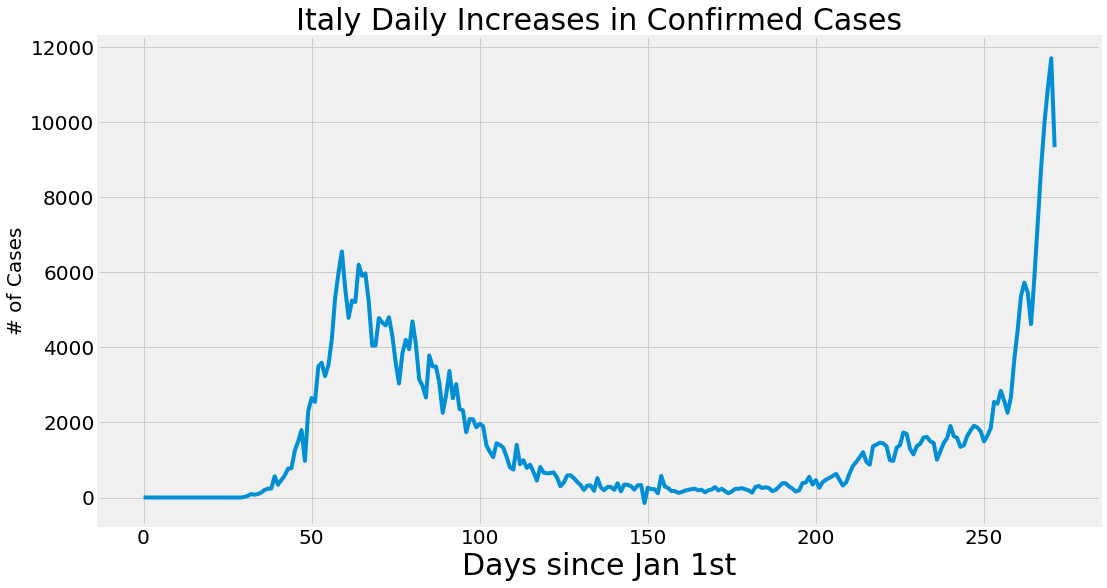

In [61]:
# Italy
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

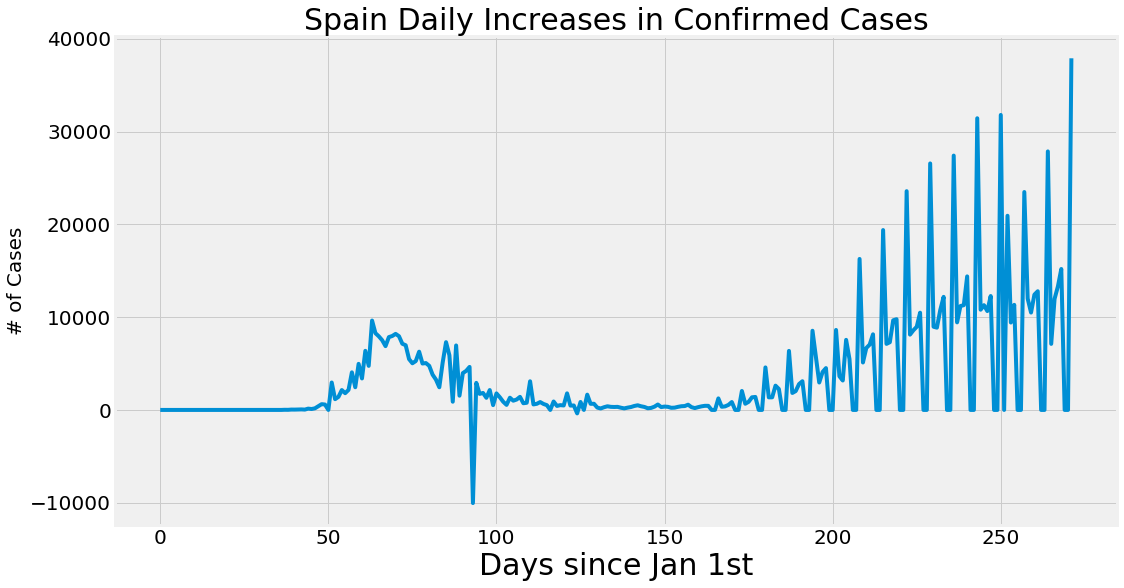

In [62]:
# Spain Daily Increase
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

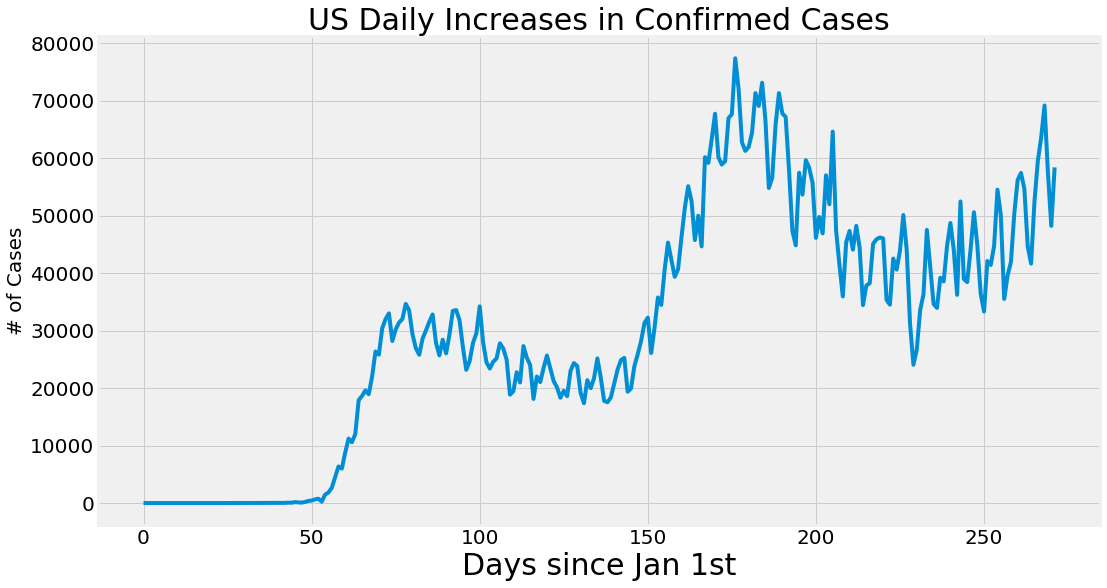

In [63]:
# US Daily Increase
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

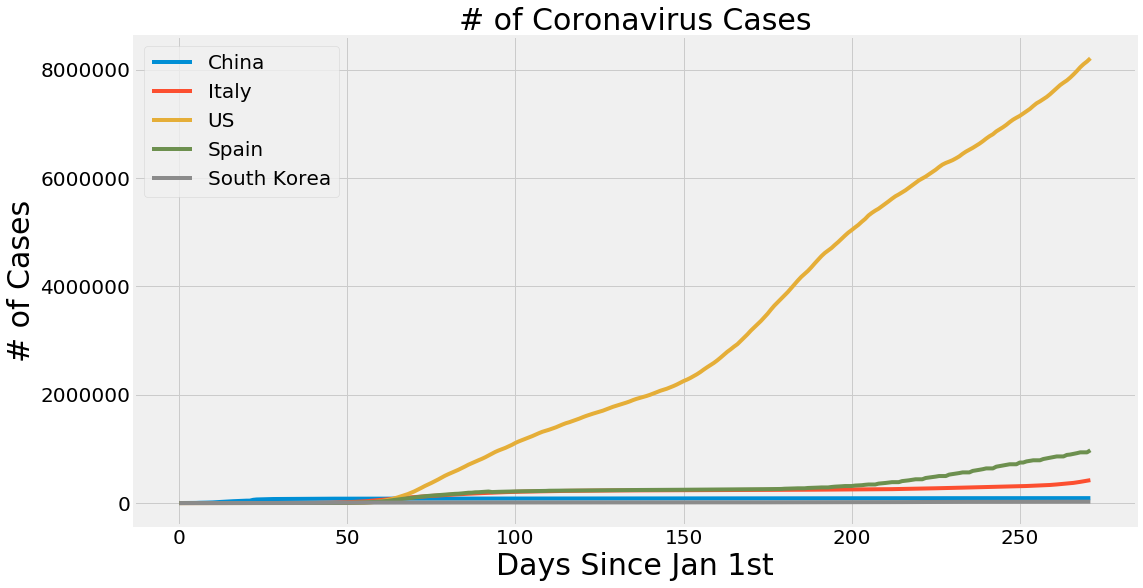

In [65]:
# Number of Corona Virus Cases
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, south_korea_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain','South Korea'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Observation for USA:
With the current highest number of cases - We will check states with highest number of cases and find any trend across states: Michigan, Ohio, Indiana 

In [73]:
latest_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')
data_us = latest_global_df.loc[latest_global_df['Country_Region'] =='US']
data_us.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,3/29/20 23:08,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,3/29/20 23:08,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,3/29/20 23:08,37.767072,-75.632346,3,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,3/29/20 23:08,43.452658,-116.241552,92,1,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,3/29/20 23:08,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [104]:
Michigan_breakdown_data_df = data_us[data_us['Province_State']=='Michigan']
#path = "/Users/mehrunisaqayyum/Downloads/⁨data_science_practice_project_2⁩/covid_19_data_US_Statewise_datetime.csv"
path = ('/Users/mehrunisaqayyum/Thinkdata/covid_19_data_US_Statewise_datetime.csv')
df = pd.read_csv(path)
Michigan_breakdown_data_df = data_us[data_us['Province_State']=='Michigan']
Michigan_breakdown_data_df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [116]:
Michigan_breakdown_data_df['Combined_Key'].value_counts()

Clare, Michigan, US         1
Cass, Michigan, US          1
St. Joseph, Michigan, US    1
Genesee, Michigan, US       1
Keweenaw, Michigan, US      1
                           ..
Gladwin, Michigan, US       1
Alpena, Michigan, US        1
Wexford, Michigan, US       1
Huron, Michigan, US         1
Tuscola, Michigan, US       1
Name: Combined_Key, Length: 85, dtype: int64

In [ ]:
#1) Create a column noting date for each csv file
#2) Read all csv file for each day.  
#3) 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



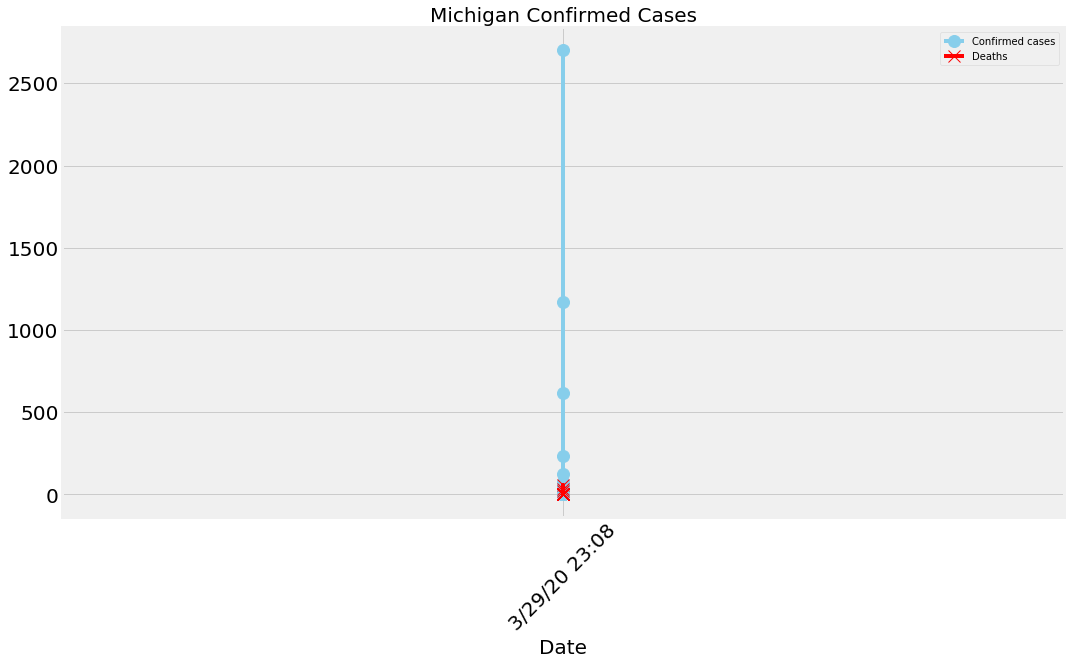

In [108]:
x_date = Michigan_breakdown_data_df['Last_Update']
y1_confirmed =Michigan_breakdown_data_df['Confirmed']
y2_death = Michigan_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Michigan Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()

In [110]:
Ohio_breakdown_data_df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

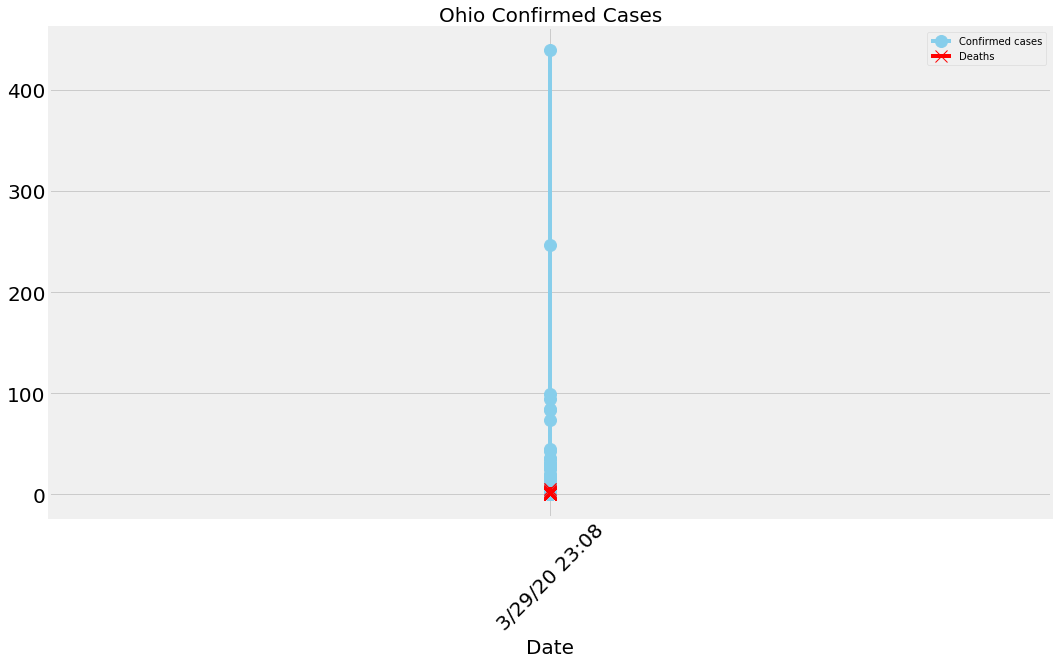

In [111]:
# Ohio
Ohio_breakdown_data_df = data_us[data_us['Province_State']=='Ohio']

#x_date = Ohio_breakdown_data_df['ObservationDate']
x_date = Ohio_breakdown_data_df['Last_Update']
y1_confirmed =Ohio_breakdown_data_df['Confirmed']
y2_death = Ohio_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Ohio Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()

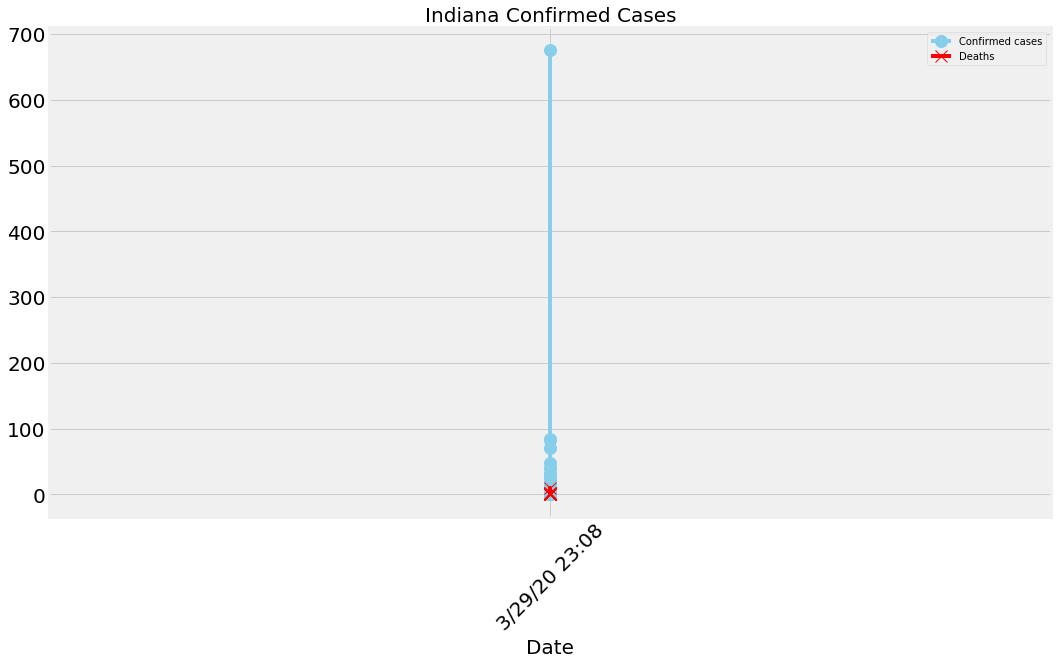

In [114]:
Indiana_breakdown_data_df = data_us[data_us['Province_State']=='Indiana']

x_date = Indiana_breakdown_data_df['Last_Update']
y1_confirmed =Indiana_breakdown_data_df['Confirmed']
y2_death = Indiana_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Indiana Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()